In [30]:
import pandas as pd 
import seaborn as sns
import numpy as np
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sqlite3
import os
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error




## ETL

In [31]:
# Read in the CSV file as a Pandas DataFrame
df = pd.read_csv(Path("resources/baseballData.csv"))

# Filtering out partial seasons
dfFullYear = df[~df['year'].isin([2020, 2024])]

# Get the number of columns before dropping unnecessary columns
num_columns_before_drop = dfFullYear.shape[1]

# Dropping unnecessary columns
dfFullYear.drop(columns=["player_id", 'k_percent', 'barrel', 'slg_percent',  'player_age', "last_name, first_name", 'year', 'ab', 'pa', 'hit', 'single', 'double', 'triple', 'out_zone_swing_miss', 'babip','bacon',
       'out_zone_swing', 'out_zone_percent', 'out_zone', 'in_zone_swing_miss', 'single', 'double', 'triple', 'home_run', 'strikeout', 'walk', 'bb_percent', 'on_base_percent', 'on_base_plus_slg', 'isolated_power','woba','wobacon',
       'in_zone_swing','batted_ball', 'groundballs', 'flyballs', 'linedrives', 'popups',
       'home_run', 'strikeout', 'walk'], inplace=True)

# Get the number of columns after dropping unnecessary columns
num_columns_after_drop = dfFullYear.shape[1]

# Print the number of columns before and after drop
print("Number of columns before drop:", num_columns_before_drop)
print("Number of columns after drop:", num_columns_after_drop)


Number of columns before drop: 65
Number of columns after drop: 30


/var/folders/q8/t_k5gtj11z5dpr8r51m6nbz00000gn/T/ipykernel_20991/3842697834.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFullYear.drop(columns=["player_id", 'k_percent', 'barrel', 'slg_percent',  'player_age', "last_name, first_name", 'year', 'ab', 'pa', 'hit', 'single', 'double', 'triple', 'out_zone_swing_miss', 'babip','bacon',


In [32]:
dfFullYear.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1104 entries, 0 to 1245
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   batting_avg             1104 non-null   float64
 1   exit_velocity_avg       1104 non-null   float64
 2   launch_angle_avg        1104 non-null   float64
 3   sweet_spot_percent      1104 non-null   float64
 4   barrel_batted_rate      1104 non-null   float64
 5   solidcontact_percent    1104 non-null   float64
 6   flareburner_percent     1104 non-null   float64
 7   poorlyunder_percent     1104 non-null   float64
 8   poorlytopped_percent    1104 non-null   float64
 9   poorlyweak_percent      1104 non-null   float64
 10  hard_hit_percent        1104 non-null   float64
 11  avg_best_speed          1104 non-null   float64
 12  avg_hyper_speed         1104 non-null   float64
 13  z_swing_percent         1104 non-null   float64
 14  z_swing_miss_percent    1104 non-null   float

In [33]:
dfFullYear.to_csv('Resources/Baseball_stats_cleaned.csv', index = False)

## SQL DB

In [34]:
# Step1. Load data file
df_cleaned = pd.read_csv('Resources/Baseball_stats_cleaned.csv')

In [35]:
df_cleaned.columns

Index(['batting_avg', 'exit_velocity_avg', 'launch_angle_avg',
       'sweet_spot_percent', 'barrel_batted_rate', 'solidcontact_percent',
       'flareburner_percent', 'poorlyunder_percent', 'poorlytopped_percent',
       'poorlyweak_percent', 'hard_hit_percent', 'avg_best_speed',
       'avg_hyper_speed', 'z_swing_percent', 'z_swing_miss_percent',
       'oz_swing_percent', 'oz_swing_miss_percent', 'oz_contact_percent',
       'meatball_swing_percent', 'iz_contact_percent', 'whiff_percent',
       'swing_percent', 'pull_percent', 'straightaway_percent',
       'opposite_percent', 'f_strike_percent', 'groundballs_percent',
       'flyballs_percent', 'linedrives_percent', 'popups_percent'],
      dtype='object')

In [36]:
# Step2. Create/connect to SQLite DB.
connection = sqlite3.connect('stats.db')

In [37]:
# Step3. Load dataset to SQLite DB
df_cleaned.to_sql('baseball_stats', connection, if_exists = 'replace')

1104

In [38]:
#Scale the Data
scaler = StandardScaler()
scaler.fit(dfFullYear)

StandardScaler()

In [39]:
df_cleaned


,batting_avg,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,barrel_batted_rate,solidcontact_percent,flareburner_percent,poorlyunder_percent,poorlytopped_percent,poorlyweak_percent,...,whiff_percent,swing_percent,pull_percent,straightaway_percent,opposite_percent,f_strike_percent,groundballs_percent,flyballs_percent,linedrives_percent,popups_percent
0,0.240,88.5,10.8,28.5,5.0,5.2,21.6,24.5,39.0,2.9,...,23.1,53.4,34.7,40.6,24.5,64.0,49.4,22.6,20.9,7.1
1,0.273,93.0,15.7,34.8,13.1,8.4,24.9,24.0,27.1,1.6,...,23.2,44.7,41.9,36.4,21.7,52.1,37.6,25.6,28.7,8.1
2,0.250,91.3,12.2,31.4,10.9,8.1,20.3,23.9,35.1,1.0,...,32.0,43.9,38.4,43.9,16.9,60.3,43.6,24.9,24.9,6.5
3,0.246,87.4,15.8,33.5,5.6,6.6,23.3,30.3,29.4,3.4,...,17.9,52.9,36.9,38.3,24.8,65.5,37.6,24.5,29.1,8.7
4,0.287,89.5,12.6,35.7,5.5,7.8,26.3,23.5,33.7,2.2,...,16.8,48.1,35.3,41.4,23.3,61.9,42.4,18.4,31.6,7.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,0.285,90.0,11.0,32.7,7.6,7.8,22.0,22.7,34.2,5.3,...,21.5,45.8,38.4,36.9,24.7,57.9,45.3,24.0,23.3,7.3
1100,0.255,92.0,11.4,32.9,11.4,7.9,23.3,20.8,32.9,3.5,...,26.4,46.8,36.6,38.1,25.2,62.6,45.8,26.5,23.3,4.5
1101,0.209,88.7,14.2,35.5,9.0,7.7,23.1,23.9,31.3,5.0,...,28.1,47.9,46.7,30.5,22.8,62.6,41.1,27.6,24.9,6.4
1102,0.258,90.6,11.2,30.3,8.4,7.3,24.1,23.9,33.7,2.5,...,24.1,47.5,37.4,35.1,27.6,62.8,44.4,23.7,24.4,7.5


In [40]:
#Assign Variables to be Trained
y = df_cleaned["batting_avg"]
X = df_cleaned.drop(columns='batting_avg')

In [41]:
X

,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,barrel_batted_rate,solidcontact_percent,flareburner_percent,poorlyunder_percent,poorlytopped_percent,poorlyweak_percent,hard_hit_percent,...,whiff_percent,swing_percent,pull_percent,straightaway_percent,opposite_percent,f_strike_percent,groundballs_percent,flyballs_percent,linedrives_percent,popups_percent
0,88.5,10.8,28.5,5.0,5.2,21.6,24.5,39.0,2.9,34.9,...,23.1,53.4,34.7,40.6,24.5,64.0,49.4,22.6,20.9,7.1
1,93.0,15.7,34.8,13.1,8.4,24.9,24.0,27.1,1.6,49.1,...,23.2,44.7,41.9,36.4,21.7,52.1,37.6,25.6,28.7,8.1
2,91.3,12.2,31.4,10.9,8.1,20.3,23.9,35.1,1.0,43.9,...,32.0,43.9,38.4,43.9,16.9,60.3,43.6,24.9,24.9,6.5
3,87.4,15.8,33.5,5.6,6.6,23.3,30.3,29.4,3.4,34.5,...,17.9,52.9,36.9,38.3,24.8,65.5,37.6,24.5,29.1,8.7
4,89.5,12.6,35.7,5.5,7.8,26.3,23.5,33.7,2.2,40.4,...,16.8,48.1,35.3,41.4,23.3,61.9,42.4,18.4,31.6,7.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,90.0,11.0,32.7,7.6,7.8,22.0,22.7,34.2,5.3,40.9,...,21.5,45.8,38.4,36.9,24.7,57.9,45.3,24.0,23.3,7.3
1100,92.0,11.4,32.9,11.4,7.9,23.3,20.8,32.9,3.5,52.0,...,26.4,46.8,36.6,38.1,25.2,62.6,45.8,26.5,23.3,4.5
1101,88.7,14.2,35.5,9.0,7.7,23.1,23.9,31.3,5.0,43.0,...,28.1,47.9,46.7,30.5,22.8,62.6,41.1,27.6,24.9,6.4
1102,90.6,11.2,30.3,8.4,7.3,24.1,23.9,33.7,2.5,46.5,...,24.1,47.5,37.4,35.1,27.6,62.8,44.4,23.7,24.4,7.5


In [42]:
#Split the data into training & testing
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state = 50)


In [43]:
#Create a Rabndom Forest Regressor Model
rf_model = RandomForestRegressor(n_estimators=500, random_state=27)

In [44]:
#Train the Model
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=27)

In [45]:
#Make Predictions
predictions = rf_model.predict(X_test)
print(predictions)


[0.26428  0.276242 0.23792  0.287304 0.293082 0.266134 0.25802  0.279282
 0.24065  0.272614 0.29025  0.26334  0.27825  0.266032 0.276192 0.259054
 0.288626 0.272618 0.28791  0.26383  0.25295  0.27612  0.273584 0.254376
 0.23263  0.296454 0.24951  0.249816 0.246452 0.280432 0.28827  0.284008
 0.244524 0.27476  0.263002 0.263936 0.260478 0.24912  0.28724  0.256184
 0.268844 0.2535   0.251682 0.296498 0.272132 0.27118  0.265246 0.285904
 0.271084 0.256622 0.275508 0.273562 0.261562 0.22487  0.287706 0.27693
 0.269842 0.23858  0.254298 0.282412 0.273422 0.267792 0.271958 0.261534
 0.268262 0.296806 0.258724 0.24502  0.262224 0.268622 0.280024 0.244732
 0.255426 0.254144 0.263706 0.243862 0.277214 0.252592 0.26222  0.261956
 0.263714 0.255814 0.272226 0.268304 0.27093  0.25942  0.278374 0.268048
 0.275532 0.288598 0.289614 0.260244 0.269736 0.24769  0.275244 0.26832
 0.26019  0.273696 0.283926 0.258428 0.260968 0.244332 0.310848 0.295774
 0.267462 0.26329  0.252958 0.281718 0.277958 0.27390

In [46]:
mean = mean_absolute_error(y_test, predictions)
print("Mean", mean)

Mean 0.016683321266968303


In [47]:
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importances = sorted(zip(importances, feature_names), reverse=True)
feature_importances

[(0.12468086659379349, 'flareburner_percent'),
 (0.10966817657965681, 'poorlyunder_percent'),
 (0.0881491862407642, 'linedrives_percent'),
 (0.06500644278651127, 'oz_contact_percent'),
 (0.04411398349491689, 'iz_contact_percent'),
 (0.04064136090910261, 'popups_percent'),
 (0.03782239767019517, 'whiff_percent'),
 (0.033992758763928675, 'oz_swing_miss_percent'),
 (0.03273294033082045, 'sweet_spot_percent'),
 (0.03150833066983677, 'exit_velocity_avg'),
 (0.030210515341492317, 'z_swing_percent'),
 (0.029185073306028982, 'pull_percent'),
 (0.02747585686901774, 'z_swing_miss_percent'),
 (0.02584096409371108, 'avg_best_speed'),
 (0.025203225386362296, 'meatball_swing_percent'),
 (0.024687737334555464, 'barrel_batted_rate'),
 (0.024408643687535335, 'poorlyweak_percent'),
 (0.02161393820499235, 'opposite_percent'),
 (0.021245814738519588, 'avg_hyper_speed'),
 (0.01917688375305732, 'straightaway_percent'),
 (0.01887087570849253, 'solidcontact_percent'),
 (0.01878104791808492, 'f_strike_percent'

In [48]:
df_importance = feature_importances

/var/folders/q8/t_k5gtj11z5dpr8r51m6nbz00000gn/T/ipykernel_20991/2102125792.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('RdYlGn_r')


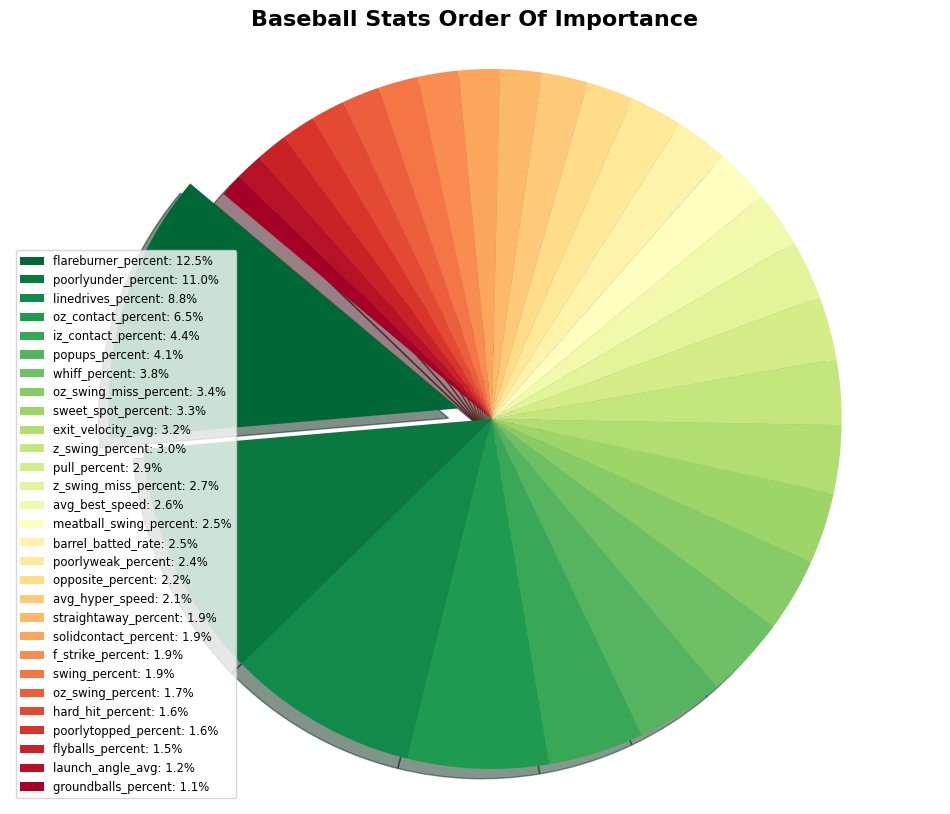

In [49]:
# Sorting the feature importances
sorted_feature_importances = sorted(feature_importances, reverse=True)

# Extracting feature importances and feature names
importances = [f[0] for f in sorted_feature_importances]
feature_names = [f[1] for f in sorted_feature_importances]

# Define a colormap that transitions from green to red
color_map = cm.get_cmap('RdYlGn_r')

# Plotting the pie chart
plt.figure(figsize=(12, 10))
# Explode the first slice (most important feature)
explode = (0.1,) + (0,) * (len(importances) - 1)
# Plotting the pie chart without percentage labels
patches, _ = plt.pie(importances, labels=None, startangle=140, explode=explode, colors=color_map(np.linspace(0, 1, len(importances))), shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adding a legend with percentages next to feature names
legend_labels = [f'{name}: {imp*100:.1f}%' for name, imp in zip(feature_names, importances)]
plt.legend(handles=patches, labels=legend_labels, loc="best", fontsize="small")

plt.title('Baseball Stats Order Of Importance', fontsize=16, fontweight='bold')
plt.show()



In [50]:
importances

[0.12468086659379349,
 0.10966817657965681,
 0.0881491862407642,
 0.06500644278651127,
 0.04411398349491689,
 0.04064136090910261,
 0.03782239767019517,
 0.033992758763928675,
 0.03273294033082045,
 0.03150833066983677,
 0.030210515341492317,
 0.029185073306028982,
 0.02747585686901774,
 0.02584096409371108,
 0.025203225386362296,
 0.024687737334555464,
 0.024408643687535335,
 0.02161393820499235,
 0.021245814738519588,
 0.01917688375305732,
 0.01887087570849253,
 0.01878104791808492,
 0.018501158204639434,
 0.017283250251690477,
 0.015766024235462243,
 0.015619752964678144,
 0.014628946366913606,
 0.01249995842138671,
 0.010683889173853073]

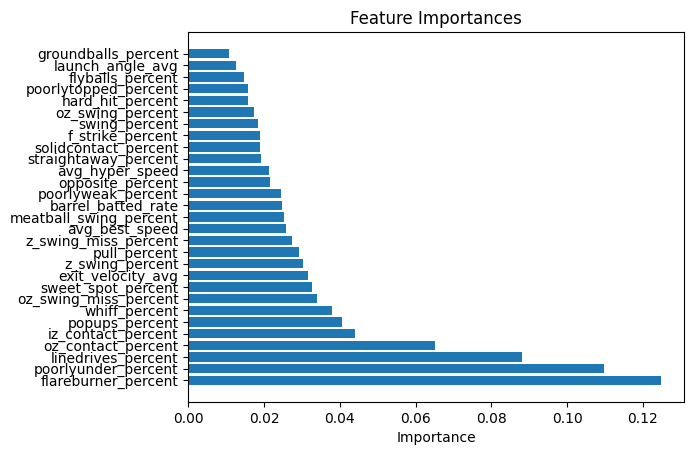

In [51]:
importances, names = zip(*feature_importances)

# Create a bar chart
plt.barh(names, importances)
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

In [52]:
X_test.columns

Index(['exit_velocity_avg', 'launch_angle_avg', 'sweet_spot_percent',
       'barrel_batted_rate', 'solidcontact_percent', 'flareburner_percent',
       'poorlyunder_percent', 'poorlytopped_percent', 'poorlyweak_percent',
       'hard_hit_percent', 'avg_best_speed', 'avg_hyper_speed',
       'z_swing_percent', 'z_swing_miss_percent', 'oz_swing_percent',
       'oz_swing_miss_percent', 'oz_contact_percent', 'meatball_swing_percent',
       'iz_contact_percent', 'whiff_percent', 'swing_percent', 'pull_percent',
       'straightaway_percent', 'opposite_percent', 'f_strike_percent',
       'groundballs_percent', 'flyballs_percent', 'linedrives_percent',
       'popups_percent'],
      dtype='object')

In [53]:
# Close SQL connection
connection.close()

In [54]:
from joblib import dump, load
dump(rf_model, 'baseball_stats.joblib')

['baseball_stats.joblib']

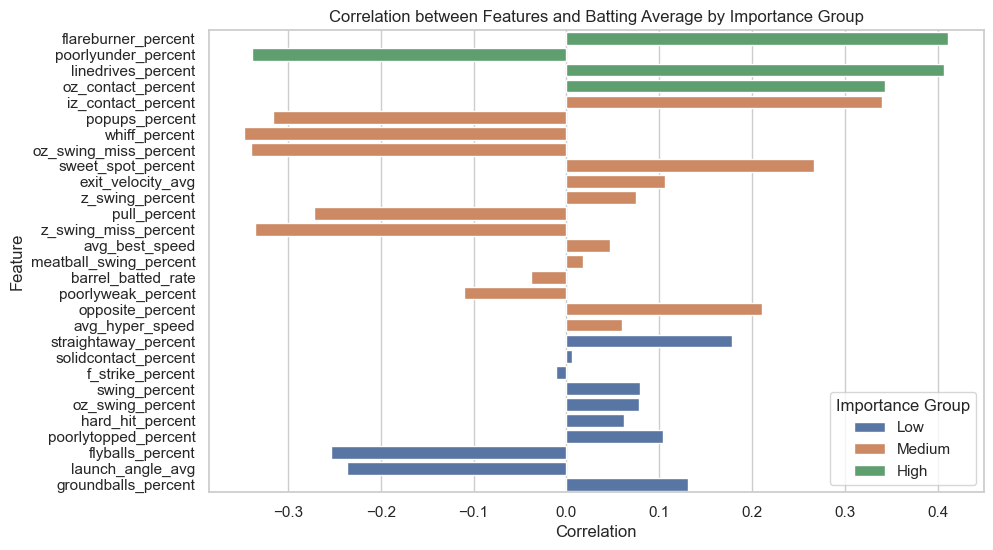

,Importance,Feature,Correlation,Importance Group
0,0.124681,flareburner_percent,0.411419,High
1,0.109668,poorlyunder_percent,-0.338879,High
2,0.088149,linedrives_percent,0.406422,High
3,0.065006,oz_contact_percent,0.342973,High
4,0.044114,iz_contact_percent,0.339751,Medium
5,0.040641,popups_percent,-0.316008,Medium
6,0.037822,whiff_percent,-0.347536,Medium
7,0.033993,oz_swing_miss_percent,-0.339474,Medium
8,0.032733,sweet_spot_percent,0.267097,Medium
9,0.031508,exit_velocity_avg,0.106211,Medium


In [55]:

# Convert the feature importances into a DataFrame
df_importance = pd.DataFrame(feature_importances, columns=['Importance', 'Feature'])

# Calculate correlations between features and batting average
correlations = {}
for feature in df_importance['Feature']:
    correlation = df[[feature, 'batting_avg']].corr().iloc[0, 1]
    correlations[feature] = correlation

# Convert correlations into a DataFrame
df_correlations = pd.DataFrame(correlations.items(), columns=['Feature', 'Correlation'])

# Merge feature importance and correlation DataFrames
df_merged = df_importance.merge(df_correlations, on='Feature')

# Define thresholds for categorizing importance
high_importance_threshold = 0.05
low_importance_threshold = 0.02

# Group features based on importance
df_merged['Importance Group'] = pd.cut(df_merged['Importance'],
                                       bins=[-np.inf, low_importance_threshold, high_importance_threshold, np.inf],
                                       labels=['Low', 'Medium', 'High'])

# Plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Correlation', y='Feature', hue='Importance Group', data=df_merged)
plt.title('Correlation between Features and Batting Average by Importance Group')
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.legend(title='Importance Group')

# Save the output image to the Resources folder
output_path = 'Resources/correlation_feature_importance.png'
plt.savefig(output_path, bbox_inches='tight')
plt.show()
df_merged

In [56]:
df_merged.head(45)
df_merged['stat_type'] = None
features_to_update = ['sweet_spot_percent', 'flareburner_percent', 'poorlyunder_percent', 'poorlytopped_percent', 'launch_angle_avg']
df_merged.loc[df_merged['Feature'].isin(features_to_update), 'stat_type'] = 'launch angle'
features_to_update = ['groundballs_percent', 'flyballs_percent', 'linedrives_percent', 'popups_percent']
df_merged.loc[df_merged['Feature'].isin(features_to_update), 'stat_type'] = 'ball outcome'
features_to_update = ['k_percent', 'whiff_percent' , 'swing_percent', 'f_strike_percent', 'z_swing_percent', 'z_swing_miss_percent', 'oz_swing_percent', 'iz_contact_percent', 'oz_swing_miss_percent', 'oz_contact_percent', 'meatball_swing_percent']
df_merged.loc[df_merged['Feature'].isin(features_to_update), 'stat_type'] = 'swing behavior'
features_to_update = ['exit_velocity_avg', 'barrel_batted_rate', 'swing_percent', 'hard_hit_percent','solidcontact_percent','avg_best_speed', 'avg_hyper_speed']
df_merged.loc[df_merged['Feature'].isin(features_to_update), 'stat_type'] = 'ball speed'
features_to_update = ['pull_percent', 'straightaway_percent', 'opposite_percent', 'poorlyweak_percent']
df_merged.loc[df_merged['Feature'].isin(features_to_update), 'stat_type'] = 'field placement'
df_merged.head(45)

,Importance,Feature,Correlation,Importance Group,stat_type
0,0.124681,flareburner_percent,0.411419,High,launch angle
1,0.109668,poorlyunder_percent,-0.338879,High,launch angle
2,0.088149,linedrives_percent,0.406422,High,ball outcome
3,0.065006,oz_contact_percent,0.342973,High,swing behavior
4,0.044114,iz_contact_percent,0.339751,Medium,swing behavior
5,0.040641,popups_percent,-0.316008,Medium,ball outcome
6,0.037822,whiff_percent,-0.347536,Medium,swing behavior
7,0.033993,oz_swing_miss_percent,-0.339474,Medium,swing behavior
8,0.032733,sweet_spot_percent,0.267097,Medium,launch angle
9,0.031508,exit_velocity_avg,0.106211,Medium,ball speed


In [57]:
print(df_merged.columns)


Index(['Importance', 'Feature', 'Correlation', 'Importance Group',
       'stat_type'],
      dtype='object')


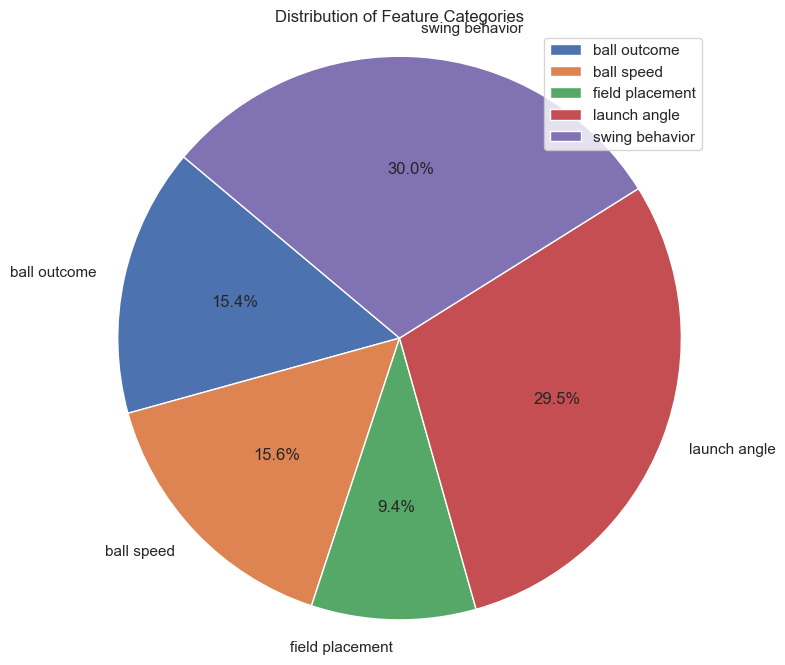

In [58]:
# Count the number of features for each stat type
stat_type_counts = df_merged.groupby("stat_type")["Importance"].sum()

# Plot
plt.figure(figsize=(8, 8))
plt.pie(stat_type_counts, labels=stat_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Feature Categories')
plt.axis('equal')

# Add legend
plt.legend(loc='upper right')

plt.show()


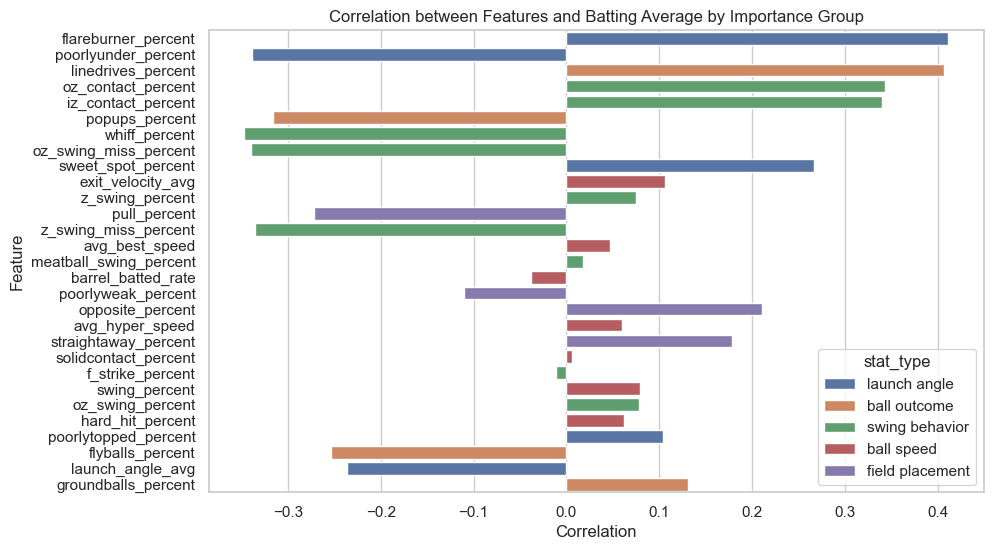

In [59]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Correlation', y='Feature', hue='stat_type', data=df_merged)
plt.title('Correlation between Features and Batting Average by Importance Group')
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.legend(title='stat_type')

# Save the output image to the Resources folder
output_path = 'Resources/correlation_feature_importance.png'
plt.savefig(output_path, bbox_inches='tight')
plt.show()

## Slugging Percentage (SLG)
Definition
Slugging percentage represents the total number of bases a player records per at-bat. Unlike on-base percentage, slugging percentage deals only with hits and does not include walks and hit-by-pitches in its equation.

Slugging percentage differs from batting average in that all hits are not valued equally. While batting average is calculated by dividing the total number of hits by the total number of at-bats, the formula for slugging percentage is: (1B + 2Bx2 + 3Bx3 + HRx4)/AB.

Although a double is not worth exactly twice as much as a single in the context of scoring runs, slugging percentage is still one of the best evaluators of power, because it accounts for more than just home runs.

Slugging percentage can also be applied as an evaluative tool for pitchers, although this is done less frequently. In such cases, it is referred to as slugging-percentage against.

In A Call
"slugging," as a verb: "to slug"

## Flyballs Percentage

## Flareburner Percentage